In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
from scipy.stats import norm 
from sklearn.preprocessing import StandardScaler 
from scipy import stats 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
import gc


In [2]:
df = pd.read_csv('train.csv')

In [24]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [27]:
numeric_columns = [
    'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
    'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal','SalePrice'
]

categorical_columns = [
    'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive'
]


In [28]:
selected_columns = numeric_columns + categorical_columns
df_new = df[selected_columns].copy()

df_new.head()


,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive
0,2003.0,2,548,0,61,0,0,0,0,0,208500,NaN,Attchd,RFn,TA,TA,Y
1,1976.0,2,460,298,0,0,0,0,0,0,181500,TA,Attchd,RFn,TA,TA,Y
2,2001.0,2,608,0,42,0,0,0,0,0,223500,TA,Attchd,RFn,TA,TA,Y
3,1998.0,3,642,0,35,272,0,0,0,0,140000,Gd,Detchd,Unf,TA,TA,Y
4,2000.0,3,836,192,84,0,0,0,0,0,250000,TA,Attchd,RFn,TA,TA,Y


In [7]:
numeric_data = df_new[numeric_columns].copy()
categorical_data = df_new[categorical_columns].copy()

In [8]:
numeric_data.isnull().sum()

GarageYrBlt      81
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
dtype: int64

In [9]:
categorical_data.isnull().sum()

FireplaceQu     690
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
PavedDrive        0
dtype: int64

In [11]:
garage_year_null_indices = df_new[df_new['GarageYrBlt'].isnull()].index

garage_type_null_indices = df_new[df_new['GarageType'].isnull()].index
garage_finish_null_indices = df_new[df_new['GarageFinish'].isnull()].index
garage_qual_null_indices = df_new[df_new['GarageQual'].isnull()].index
garage_cond_null_indices = df_new[df_new['GarageCond'].isnull()].index

# Checking if all these indices are the same
same_null_indices = (
    set(garage_year_null_indices) == set(garage_type_null_indices) == 
    set(garage_finish_null_indices) == set(garage_qual_null_indices) == 
    set(garage_cond_null_indices)
)

same_null_indices, list(garage_year_null_indices) 


(True,
 [39,
  48,
  78,
  88,
  89,
  99,
  108,
  125,
  127,
  140,
  148,
  155,
  163,
  165,
  198,
  210,
  241,
  250,
  287,
  291,
  307,
  375,
  386,
  393,
  431,
  434,
  441,
  464,
  495,
  520,
  528,
  533,
  535,
  562,
  582,
  613,
  614,
  620,
  635,
  636,
  638,
  649,
  705,
  710,
  738,
  750,
  784,
  826,
  843,
  921,
  942,
  954,
  960,
  968,
  970,
  976,
  1009,
  1011,
  1030,
  1038,
  1096,
  1123,
  1131,
  1137,
  1143,
  1173,
  1179,
  1218,
  1219,
  1234,
  1257,
  1283,
  1323,
  1325,
  1326,
  1337,
  1349,
  1407,
  1449,
  1450,
  1453])

In [12]:
num_garage_year_null_indices = len(garage_year_null_indices)
same_null_indices, num_garage_year_null_indices

(True, 81)

In [16]:
#81개의 null값이 모두 같음 -> 차고가 없음?

In [13]:
df_new['GarageYrBlt'].fillna(0, inplace=True)

garage_related_columns = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
df_new[garage_related_columns] = df[garage_related_columns].fillna('NoGarage')

df_new[garage_related_columns + ['GarageYrBlt']].isnull().sum()


GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
GarageYrBlt     0
dtype: int64

In [14]:
df_new['FireplaceQu'].fillna('None', inplace=True)

In [16]:
df_new.isnull().sum()

GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
dtype: int64

In [17]:
df_new.describe()

,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1868.739726,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041
std,453.697295,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1958.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1977.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000


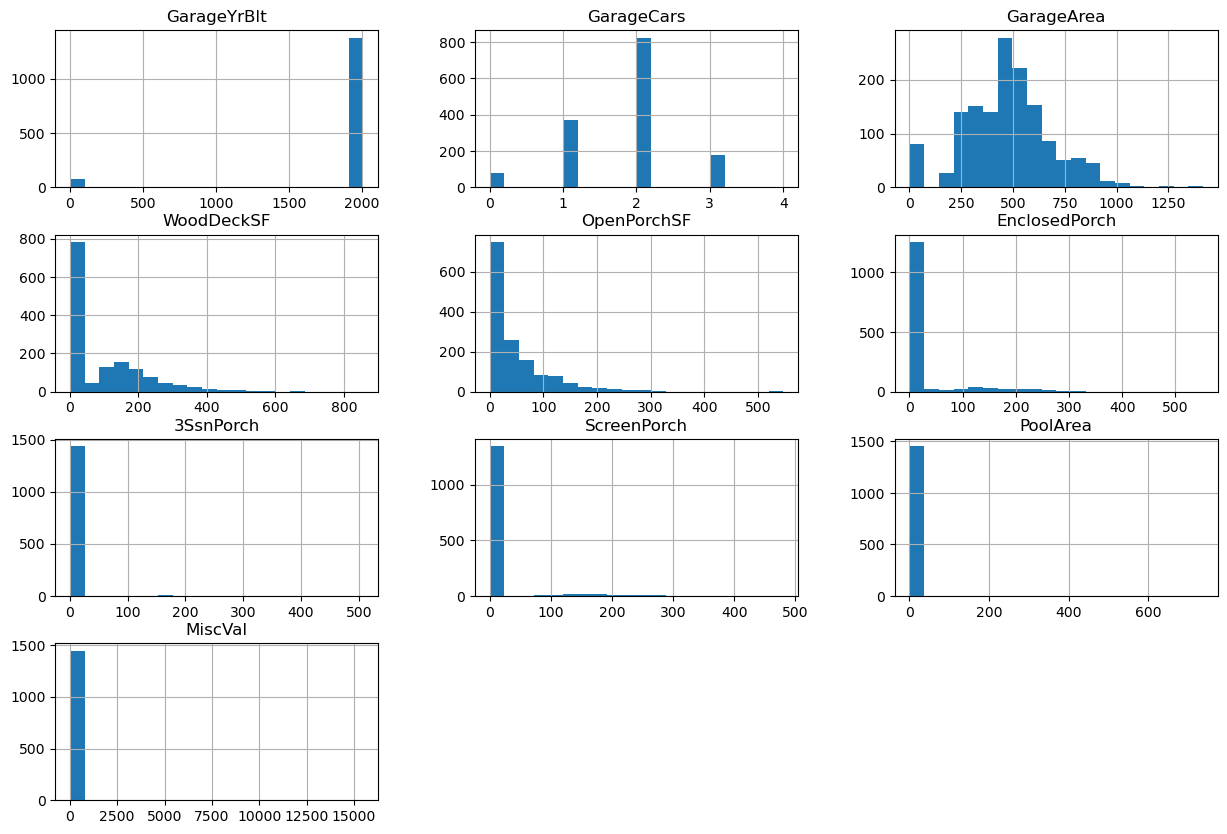

In [19]:
df_new[numeric_columns].hist(figsize=(15, 10), bins=20)
plt.show()

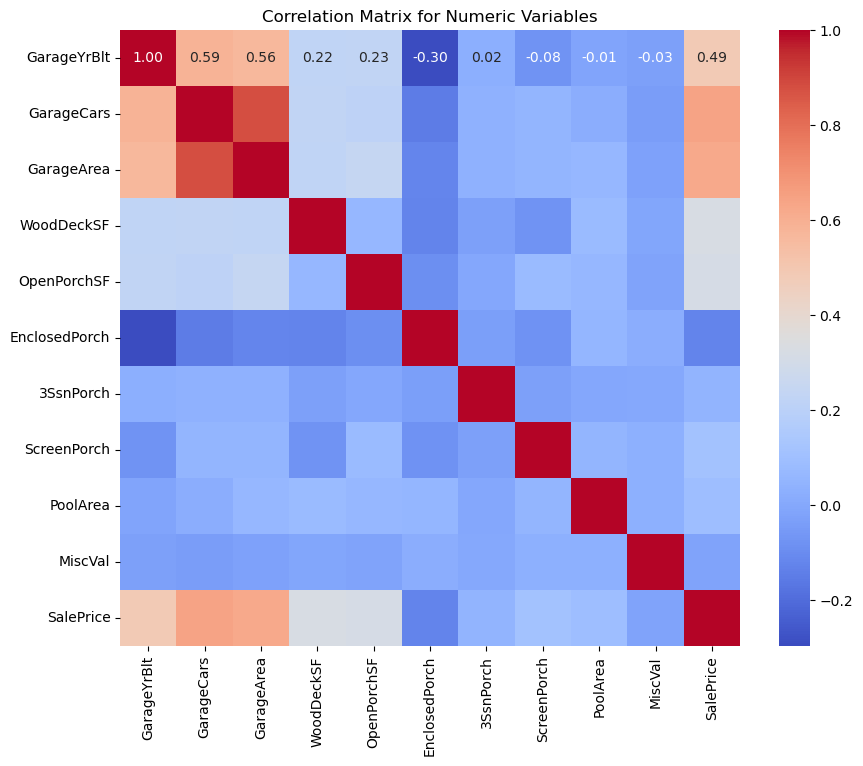

In [29]:
corr_matrix = df_new[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Numeric Variables')
plt.show()

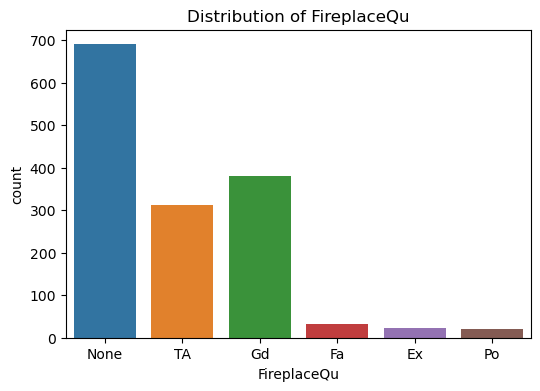

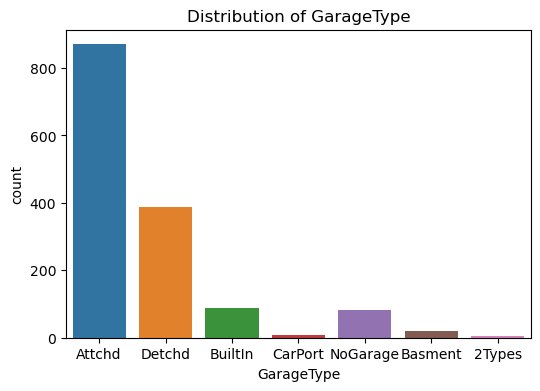

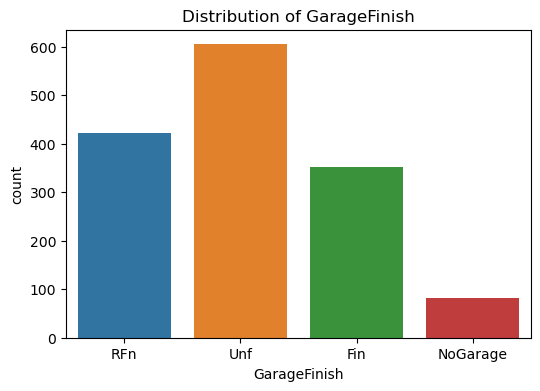

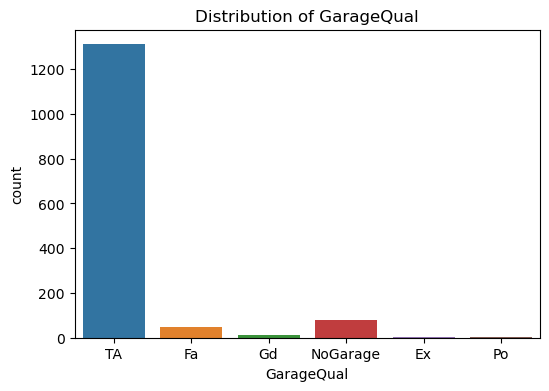

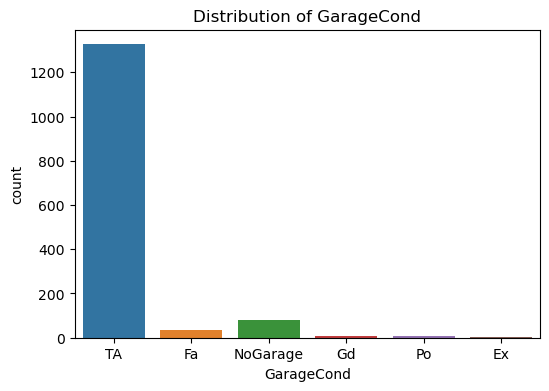

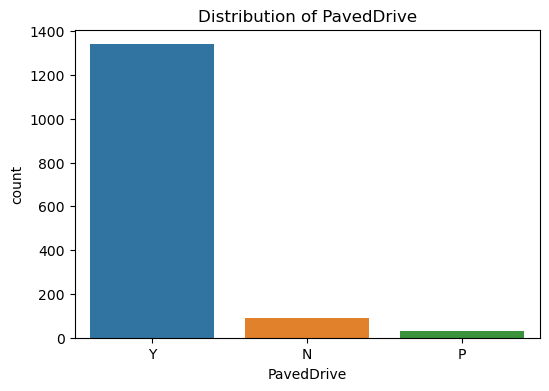

In [21]:
for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df_new, x=col)
    plt.title(f'Distribution of {col}')
    plt.show()

In [34]:
high_corr = corr_matrix[(corr_matrix >= 0.6) | (corr_matrix <= -0.6)]

high_corr = high_corr.stack().reset_index()

high_corr_filtered = high_corr[(high_corr[0] != 1)]

high_corr_filtered.columns = ['Variable 1', 'Variable 2', 'Correlation']
high_corr_filtered = high_corr_filtered.sort_values(by='Correlation', ascending=False)
high_corr_filtered 

,Variable 1,Variable 2,Correlation
2,GarageCars,GarageArea,0.882475
4,GarageArea,GarageCars,0.882475
3,GarageCars,SalePrice,0.640409
14,SalePrice,GarageCars,0.640409
6,GarageArea,SalePrice,0.623431
15,SalePrice,GarageArea,0.623431


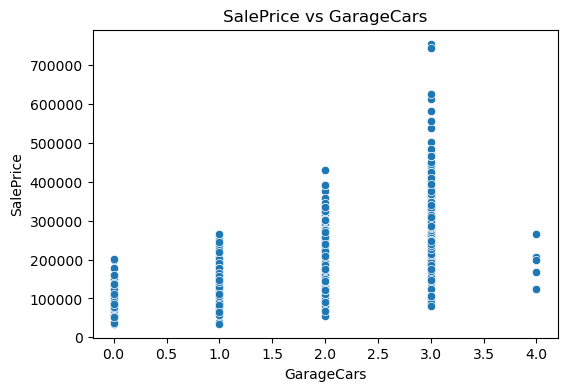

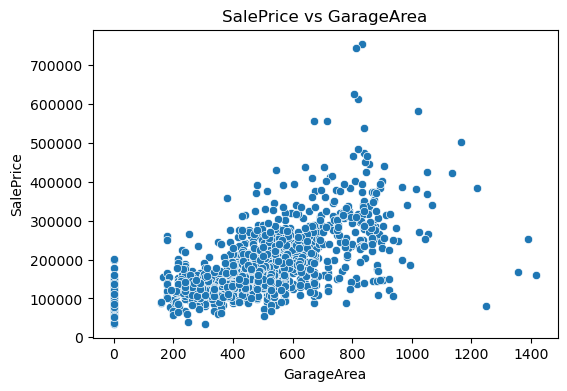

In [35]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='GarageCars', y='SalePrice', data=df_new)
plt.title('SalePrice vs GarageCars')
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(x='GarageArea', y='SalePrice', data=df_new)
plt.title('SalePrice vs GarageArea')
plt.show()

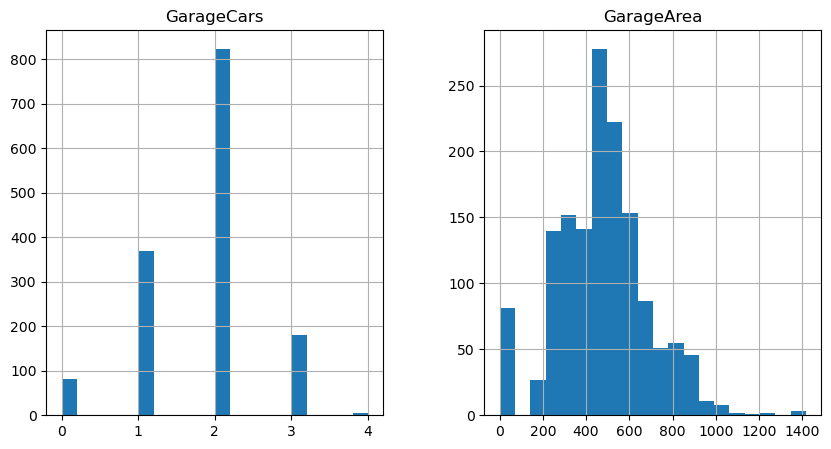

In [36]:
df_new[['GarageCars', 'GarageArea']].hist(figsize=(10, 5), bins=20)
plt.show()

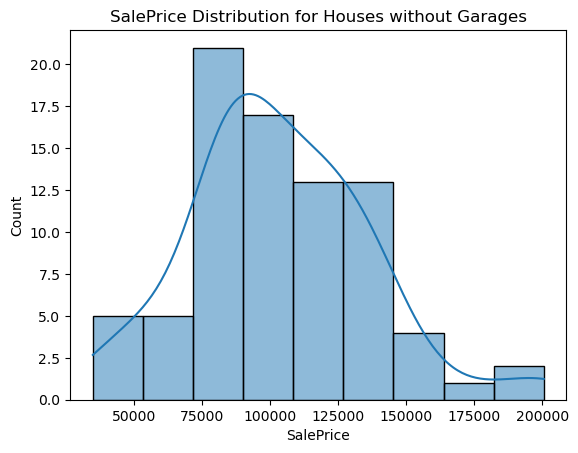

In [37]:
df_no_garage = df_new[df_new['GarageCars'] == 0]
sns.histplot(df_no_garage['SalePrice'], kde=True)
plt.title('SalePrice Distribution for Houses without Garages')
plt.show()

In [38]:
df_new['GarageSizeByArea'] = df_new['GarageArea'] / (df_new['GarageCars'] + 1)

In [39]:
df_new['HasGarage'] = df_new['GarageCars'].apply(lambda x: 1 if x > 0 else 0)

In [40]:
df_new['GarageCapacity'] = df_new['GarageCars'] * df_new['GarageArea']

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_new[numeric_columns] = scaler.fit_transform(df_new[numeric_columns])

In [42]:
df_new_encoded = pd.get_dummies(df_new, columns=categorical_columns, drop_first=True)

In [43]:
df_new_encoded.head()

,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,...,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y
0,0.992426,0.311725,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,...,False,False,False,True,False,False,False,True,False,True
1,-0.101543,0.311725,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,...,False,False,False,True,False,False,False,True,False,True
2,0.911391,0.311725,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,...,False,False,False,True,False,False,False,True,False,True
3,0.789839,1.650307,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,...,False,False,False,True,False,False,False,True,False,True
4,0.870874,1.650307,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,...,False,False,False,True,False,False,False,True,False,True


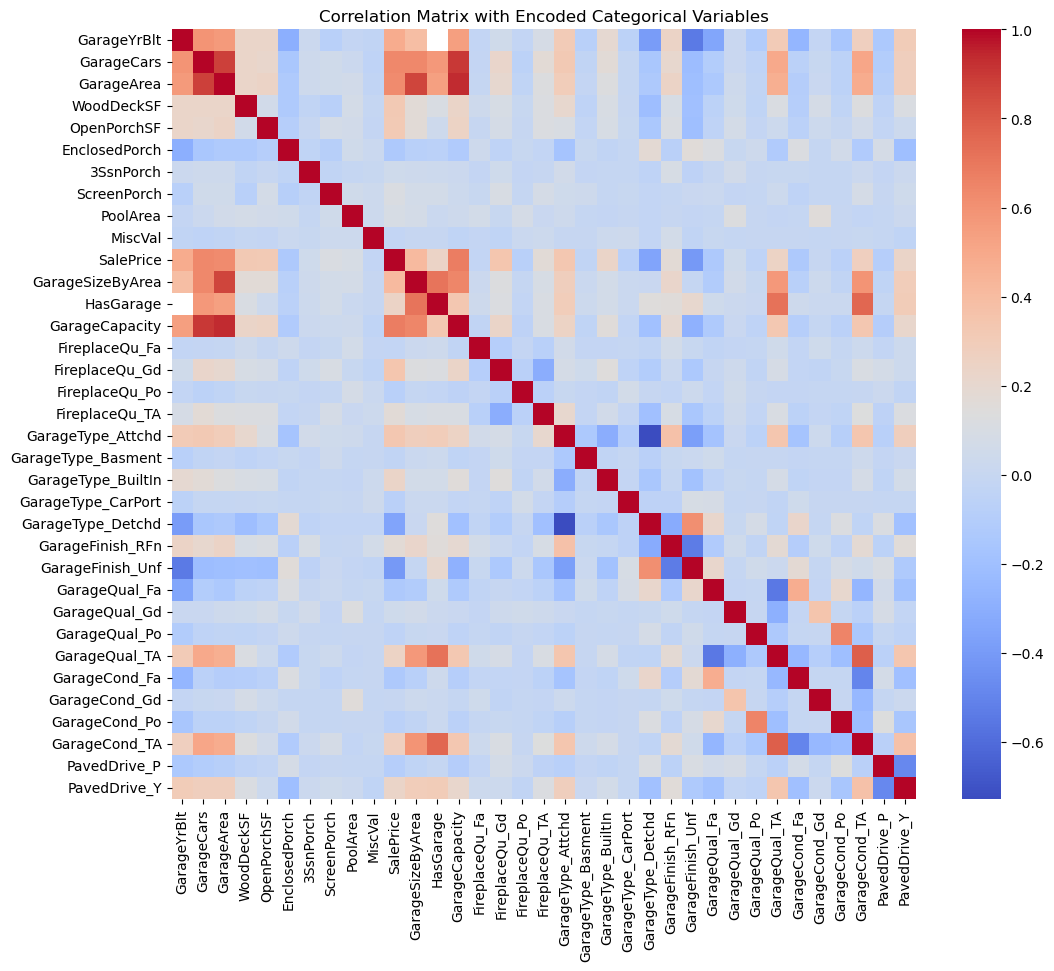

SalePrice             1.000000
GarageCapacity        0.680058
GarageCars            0.640409
GarageArea            0.623431
GarageYrBlt           0.486362
GarageSizeByArea      0.405940
FireplaceQu_Gd        0.339329
GarageType_Attchd     0.335961
WoodDeckSF            0.324413
OpenPorchSF           0.315856
GarageCond_TA         0.275872
GarageQual_TA         0.245346
HasGarage             0.236832
GarageType_BuiltIn    0.235449
PavedDrive_Y          0.231968
GarageFinish_RFn      0.169792
FireplaceQu_TA        0.163147
ScreenPorch           0.111447
PoolArea              0.092404
3SsnPorch             0.044584
GarageQual_Gd         0.043291
GarageCond_Gd        -0.000983
MiscVal              -0.021190
FireplaceQu_Fa       -0.026086
GarageType_Basment   -0.029425
GarageQual_Po        -0.046142
GarageCond_Po        -0.063296
GarageType_CarPort   -0.070371
FireplaceQu_Po       -0.075916
PavedDrive_P         -0.088623
EnclosedPorch        -0.128578
GarageCond_Fa        -0.130774
GarageQu

In [44]:
corr_matrix_with_encoded = df_new_encoded.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_with_encoded, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix with Encoded Categorical Variables')
plt.show()

saleprice_corr = corr_matrix_with_encoded['SalePrice'].sort_values(ascending=False)
print(saleprice_corr)

In [45]:
encoded_cols = [col for col in df_new_encoded.columns if col.startswith('Garage') or col.startswith('PavedDrive')]
for col in encoded_cols:
    print(f'Mean SalePrice for {col}:')
    print(df_new_encoded.groupby(col)['SalePrice'].mean())
    print()

Mean SalePrice for GarageYrBlt:
GarageYrBlt
-3.180863   -0.592092
-2.937759   -0.578241
-2.856725    0.743922
-2.775690   -0.704162
-2.613620   -0.377480
               ...   
 1.113978    1.020964
 1.154495    0.748617
 1.195013    1.582162
 1.235530    1.576394
 1.276047    1.976363
Name: SalePrice, Length: 97, dtype: float64

Mean SalePrice for GarageCars:
GarageCars
-2.365440   -0.977191
-1.026858   -0.664916
 0.311725    0.036901
 1.650307    1.620783
 2.988889    0.147763
Name: SalePrice, dtype: float64

Mean SalePrice for GarageArea:
GarageArea
-2.212963   -0.977191
-1.464361   -1.157475
-1.445645   -0.326401
-1.370785   -0.302774
-1.342713   -0.327660
               ...   
 3.495131    2.569767
 3.626136   -1.258211
 4.131443   -0.162704
 4.290521    0.911308
 4.421526   -0.263440
Name: SalePrice, Length: 441, dtype: float64

Mean SalePrice for GarageSizeByArea:
GarageSizeByArea
0.000000     -0.977191
80.000000    -1.157475
82.000000    -0.326401
90.000000    -0.302774
93.00000

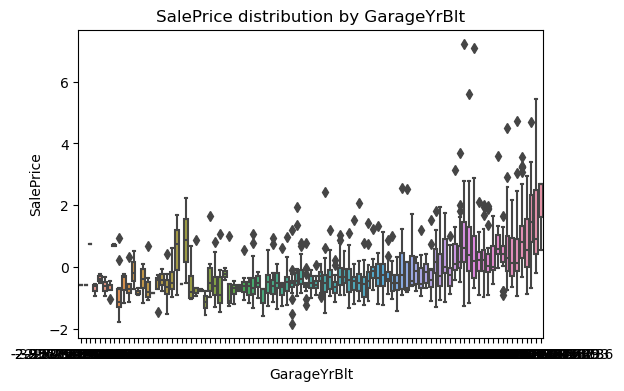

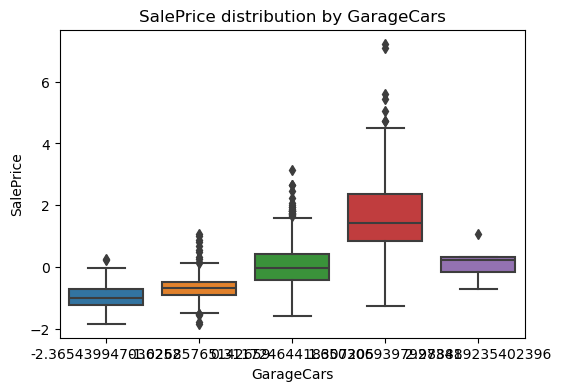

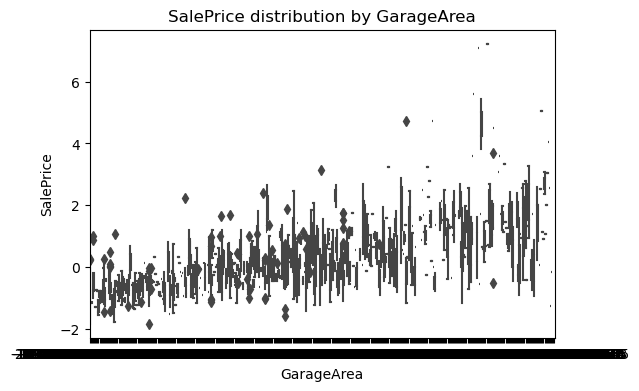

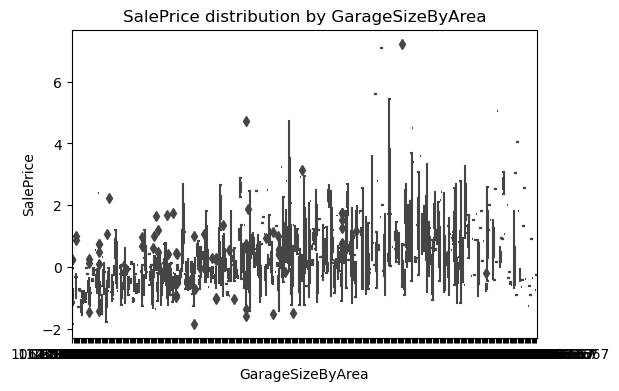

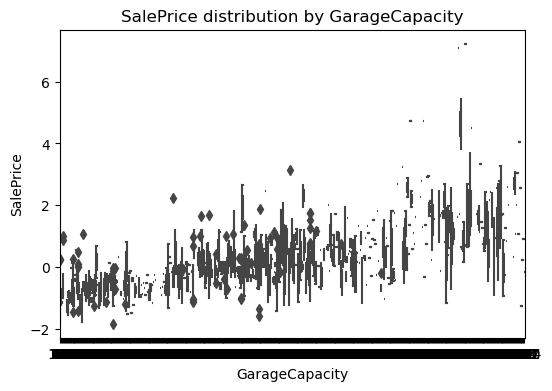

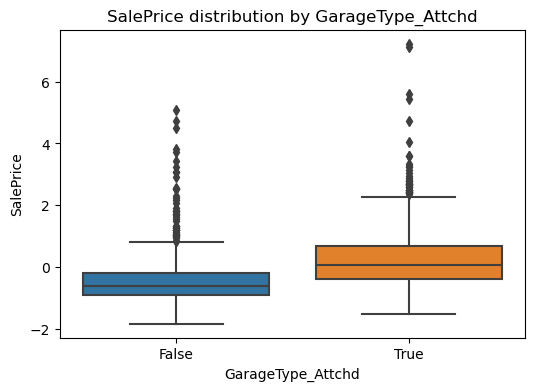

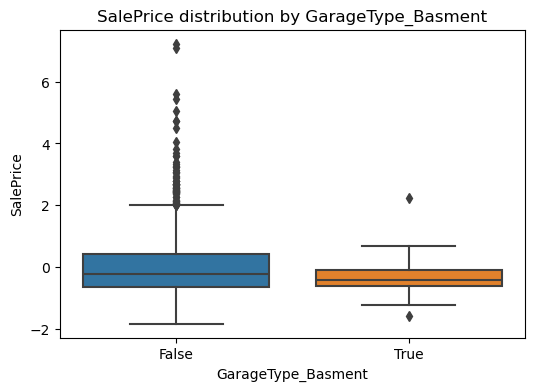

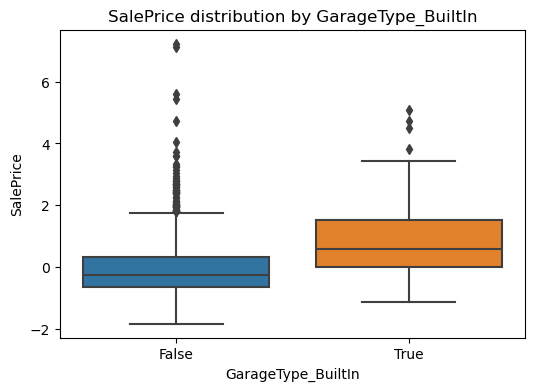

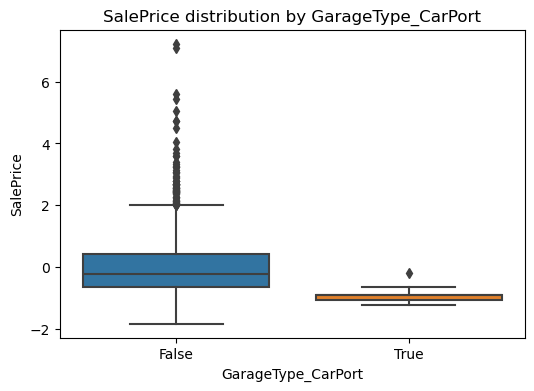

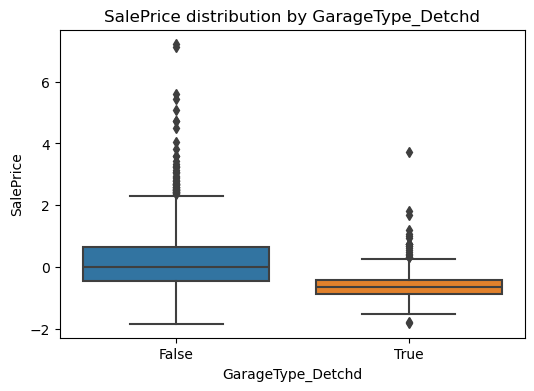

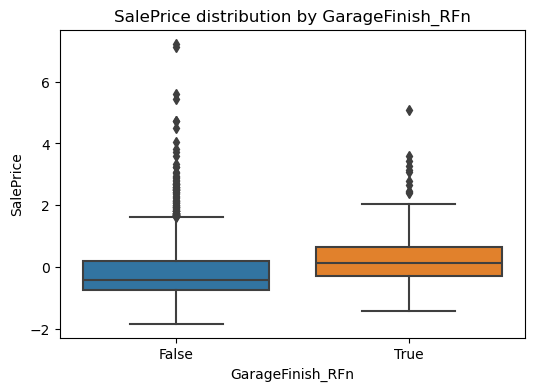

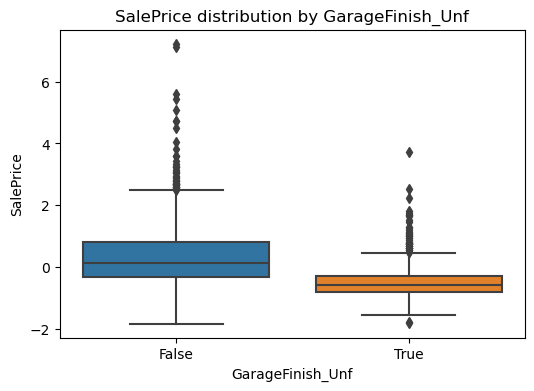

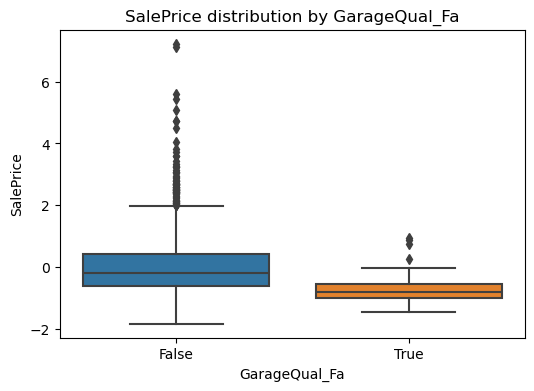

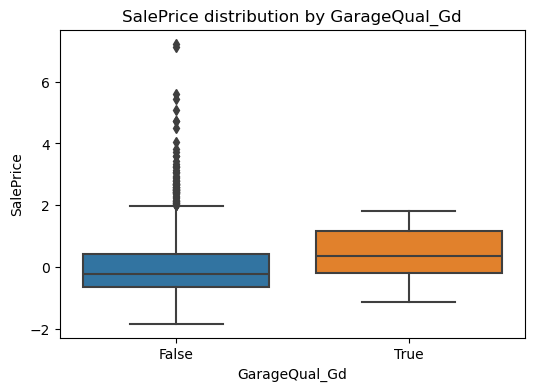

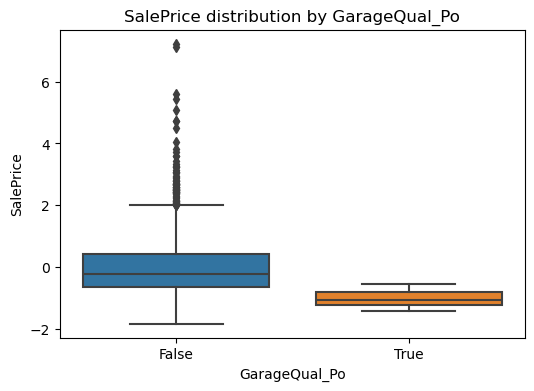

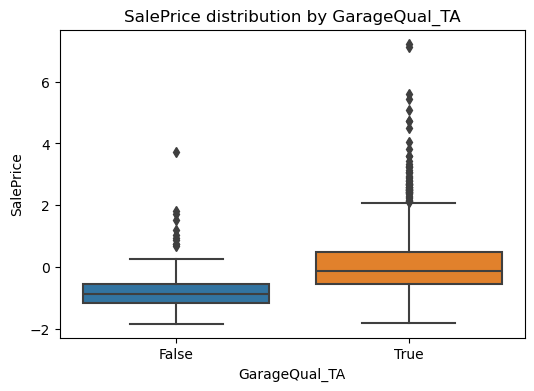

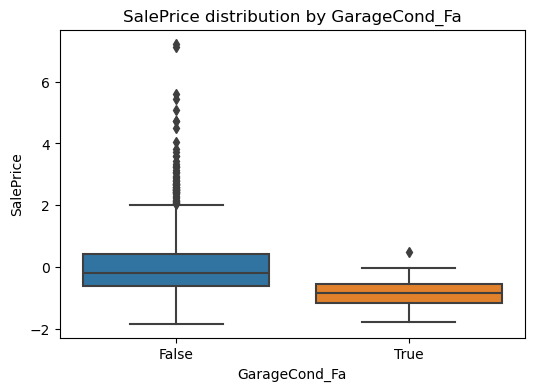

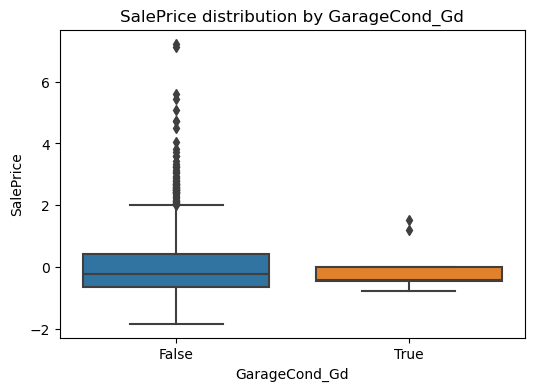

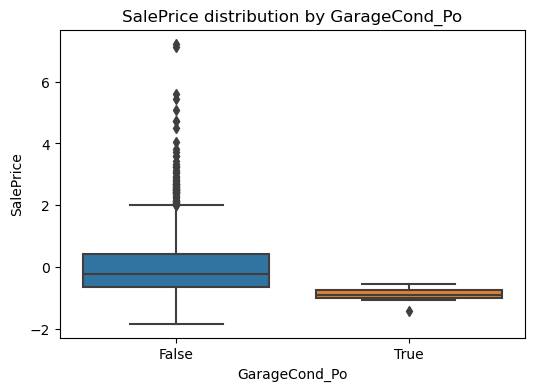

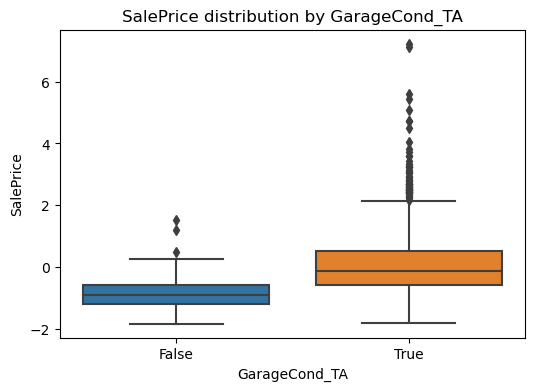

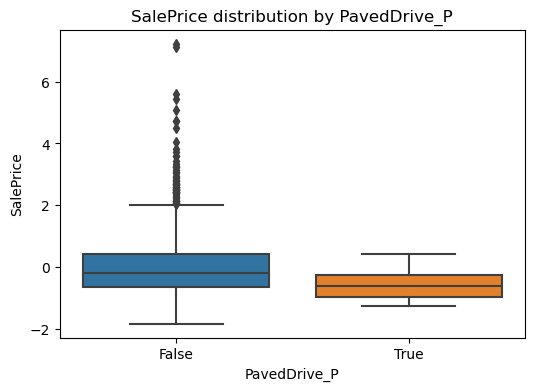

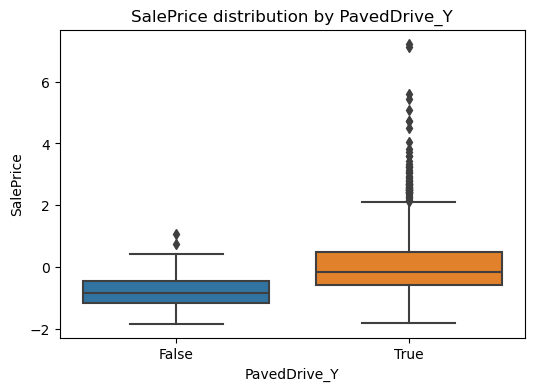

In [46]:
#범주형 변수 BoxPlot
for col in encoded_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=col, y='SalePrice', data=df_new_encoded)
    plt.title(f'SalePrice distribution by {col}')
    plt.show()

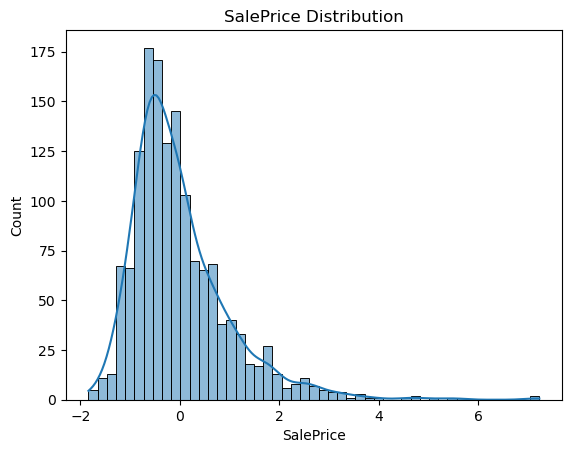

In [48]:
#SalePrice기준 분포 및 이상치 확인
sns.histplot(df_new_encoded['SalePrice'], kde=True)
plt.title('SalePrice Distribution')
plt.show()

In [53]:
saleprice_corr = corr_matrix_with_encoded['SalePrice'].sort_values(ascending=False)

important_vars = saleprice_corr[(saleprice_corr >= 0.6) | (saleprice_corr <= -0.6)]

# Displaying the important variables
important_vars

SalePrice         1.000000
GarageCapacity    0.680058
GarageCars        0.640409
GarageArea        0.623431
Name: SalePrice, dtype: float64

In [54]:
saleprice_corr = corr_matrix_with_encoded['SalePrice'].sort_values(ascending=False)

important_vars = saleprice_corr[(saleprice_corr >= 0.4) | (saleprice_corr <= -0.4)]

important_vars

SalePrice           1.000000
GarageCapacity      0.680058
GarageCars          0.640409
GarageArea          0.623431
GarageYrBlt         0.486362
GarageSizeByArea    0.405940
GarageFinish_Unf   -0.410608
Name: SalePrice, dtype: float64

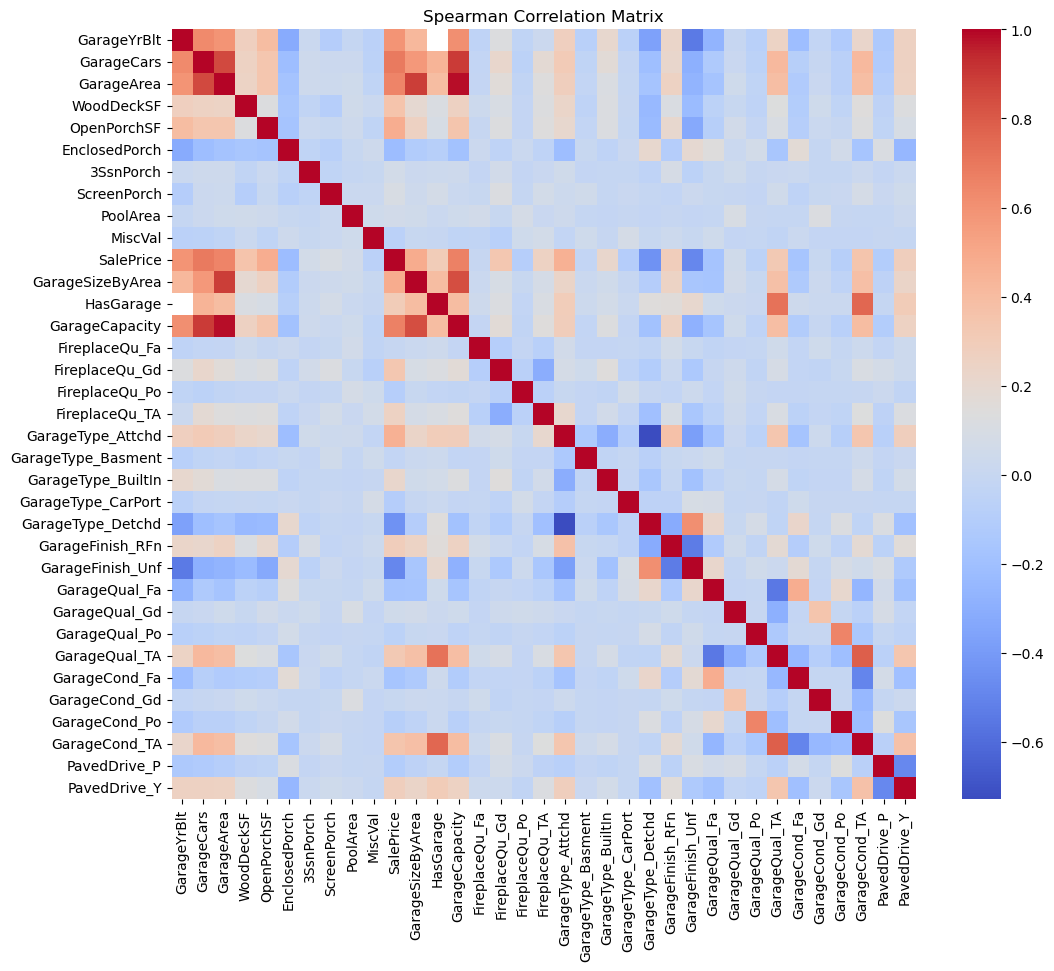

SalePrice             1.000000
GarageCars            0.690711
GarageCapacity        0.668591
GarageArea            0.649379
GarageYrBlt           0.593788
GarageSizeByArea      0.480301
OpenPorchSF           0.477561
GarageType_Attchd     0.455399
WoodDeckSF            0.353802
GarageCond_TA         0.348751
FireplaceQu_Gd        0.336912
GarageQual_TA         0.322251
HasGarage             0.300454
GarageFinish_RFn      0.287876
PavedDrive_Y          0.279455
FireplaceQu_TA        0.250872
GarageType_BuiltIn    0.215069
ScreenPorch           0.100070
3SsnPorch             0.065440
PoolArea              0.058453
GarageQual_Gd         0.053605
GarageCond_Gd         0.002896
FireplaceQu_Fa       -0.001230
GarageType_Basment   -0.026707
GarageQual_Po        -0.057941
MiscVal              -0.062727
GarageCond_Po        -0.086260
FireplaceQu_Po       -0.088131
GarageType_CarPort   -0.095924
PavedDrive_P         -0.103695
GarageCond_Fa        -0.162047
GarageQual_Fa        -0.174695
Enclosed

In [56]:
spearman_corr = df_new_encoded.corr(method='spearman')

plt.figure(figsize=(12, 10))
sns.heatmap(spearman_corr, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Spearman Correlation Matrix')
plt.show()

spearman_corr_saleprice = spearman_corr['SalePrice'].sort_values(ascending=False)
print(spearman_corr_saleprice)


In [59]:
from scipy import stats

# T-test between houses with and without garages
garage_yes = df_new[df_new['HasGarage'] == 1]['SalePrice']
garage_no = df_new[df_new['HasGarage'] == 0]['SalePrice']

t_stat, p_value = stats.ttest_ind(garage_yes, garage_no)

print(f'T-statistic: {t_stat}, P-value: {p_value}')

T-statistic: 9.307930935960062, P-value: 4.627259402063783e-20


In [61]:
import statsmodels.api as sm

X = df_new_encoded[['GarageArea']]
y = df_new_encoded['SalePrice']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     927.0
Date:                Fri, 18 Oct 2024   Prob (F-statistic):          5.27e-158
Time:                        09:16:34   Log-Likelihood:                -1712.4
No. Observations:                1460   AIC:                             3429.
Df Residuals:                    1458   BIC:                             3439.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.329e-16      0.020   6.49e-15      1.0

In [64]:
df_new_encoded.head()

,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,...,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y
0,0.992426,0.311725,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,...,False,False,False,True,False,False,False,True,False,True
1,-0.101543,0.311725,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,...,False,False,False,True,False,False,False,True,False,True
2,0.911391,0.311725,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,...,False,False,False,True,False,False,False,True,False,True
3,0.789839,1.650307,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,...,False,False,False,True,False,False,False,True,False,True
4,0.870874,1.650307,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,...,False,False,False,True,False,False,False,True,False,True


In [65]:
df_new_encoded['GarageQual_NoGarage'] = df_new_encoded['GarageQual_None'] if 'GarageQual_None' in df_new_encoded.columns else (df_new['GarageQual'] == 'None').astype(int)

In [67]:
df_new_encoded.head()

,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,...,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,GarageQual_NoGarage
0,0.992426,0.311725,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,...,False,False,True,False,False,False,True,False,True,0
1,-0.101543,0.311725,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,...,False,False,True,False,False,False,True,False,True,0
2,0.911391,0.311725,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,...,False,False,True,False,False,False,True,False,True,0
3,0.789839,1.650307,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,...,False,False,True,False,False,False,True,False,True,0
4,0.870874,1.650307,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,...,False,False,True,False,False,False,True,False,True,0


In [68]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df_new_encoded['GarageQual_NoGarage'], df_new_encoded['PavedDrive_P'])

chi2, p, dof, ex = chi2_contingency(contingency_table)

print(f"Chi-Square Test Statistic: {chi2}, P-value: {p}")

Chi-Square Test Statistic: 0.0, P-value: 1.0


In [69]:
from scipy import stats

garage_yes = df_new[df_new['HasGarage'] == 1]['SalePrice']
garage_no = df_new[df_new['HasGarage'] == 0]['SalePrice']

t_stat, p_value = stats.ttest_ind(garage_yes, garage_no)

print(f'T-statistic: {t_stat}, P-value: {p_value}')

T-statistic: 9.307930935960062, P-value: 4.627259402063783e-20


In [71]:
f_stat, p_value = stats.f_oneway(
    df_new_encoded[df_new_encoded['GarageQual_NoGarage'] == 1]['SalePrice'],
    df_new_encoded[df_new_encoded['GarageQual_TA'] == 1]['SalePrice'],
    df_new_encoded[df_new_encoded['GarageQual_Gd'] == 1]['SalePrice']
)

print(f'F-statistic: {f_stat}, P-value: {p_value}')


F-statistic: nan, P-value: nan


In [72]:
import statsmodels.api as sm

# Simple Linear Regression between GarageArea and SalePrice
X = df_new_encoded[['GarageArea']]
y = df_new_encoded['SalePrice']

# Adding a constant for intercept
X = sm.add_constant(X)

# Fitting the model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     927.0
Date:                Fri, 18 Oct 2024   Prob (F-statistic):          5.27e-158
Time:                        09:20:03   Log-Likelihood:                -1712.4
No. Observations:                1460   AIC:                             3429.
Df Residuals:                    1458   BIC:                             3439.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.329e-16      0.020   6.49e-15      1.0

In [75]:
df_new_encoded.isnull().sum()

GarageYrBlt            81
GarageCars              0
GarageArea              0
WoodDeckSF              0
OpenPorchSF             0
EnclosedPorch           0
3SsnPorch               0
ScreenPorch             0
PoolArea                0
MiscVal                 0
SalePrice               0
GarageSizeByArea        0
HasGarage               0
GarageCapacity          0
FireplaceQu_Fa          0
FireplaceQu_Gd          0
FireplaceQu_Po          0
FireplaceQu_TA          0
GarageType_Attchd       0
GarageType_Basment      0
GarageType_BuiltIn      0
GarageType_CarPort      0
GarageType_Detchd       0
GarageFinish_RFn        0
GarageFinish_Unf        0
GarageQual_Fa           0
GarageQual_Gd           0
GarageQual_Po           0
GarageQual_TA           0
GarageCond_Fa           0
GarageCond_Gd           0
GarageCond_Po           0
GarageCond_TA           0
PavedDrive_P            0
PavedDrive_Y            0
GarageQual_NoGarage     0
dtype: int64

In [77]:
df_new_encoded['GarageYrBlt'].fillna(0, inplace=True)

In [78]:
df_new_encoded.isnull().sum()

GarageYrBlt            0
GarageCars             0
GarageArea             0
WoodDeckSF             0
OpenPorchSF            0
EnclosedPorch          0
3SsnPorch              0
ScreenPorch            0
PoolArea               0
MiscVal                0
SalePrice              0
GarageSizeByArea       0
HasGarage              0
GarageCapacity         0
FireplaceQu_Fa         0
FireplaceQu_Gd         0
FireplaceQu_Po         0
FireplaceQu_TA         0
GarageType_Attchd      0
GarageType_Basment     0
GarageType_BuiltIn     0
GarageType_CarPort     0
GarageType_Detchd      0
GarageFinish_RFn       0
GarageFinish_Unf       0
GarageQual_Fa          0
GarageQual_Gd          0
GarageQual_Po          0
GarageQual_TA          0
GarageCond_Fa          0
GarageCond_Gd          0
GarageCond_Po          0
GarageCond_TA          0
PavedDrive_P           0
PavedDrive_Y           0
GarageQual_NoGarage    0
dtype: int64

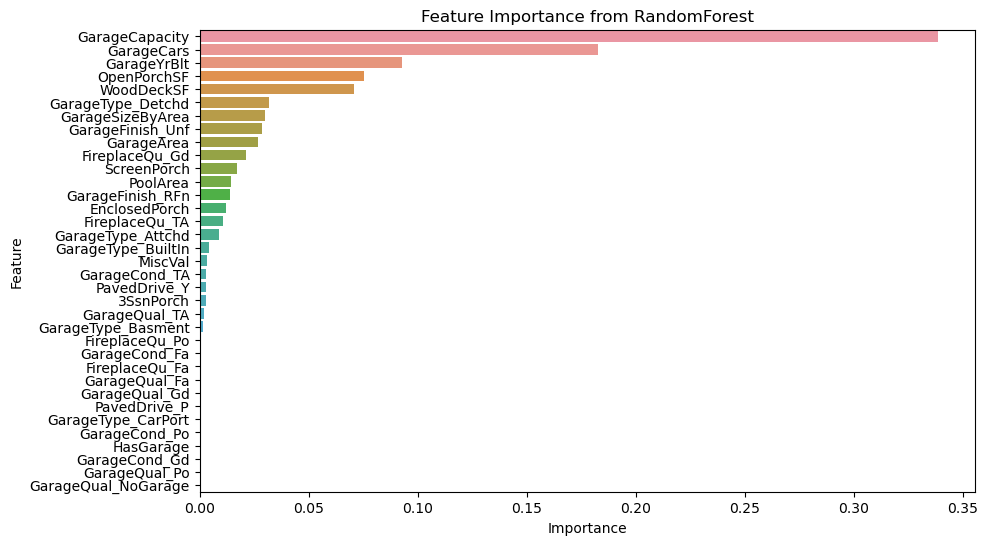

In [79]:
from sklearn.ensemble import RandomForestRegressor

# Training a RandomForestRegressor
X = df_new_encoded.drop('SalePrice', axis=1)
y = df_new_encoded['SalePrice']

rf = RandomForestRegressor()
rf.fit(X, y)

# Extracting feature importances
importances = rf.feature_importances_

# Creating a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from RandomForest')
plt.show()

In [81]:
pip install shap

Using cached shap-0.46.0-cp311-cp311-win_amd64.whl (456 kB)
Note: you may need to restart the kernel to use updated packages.


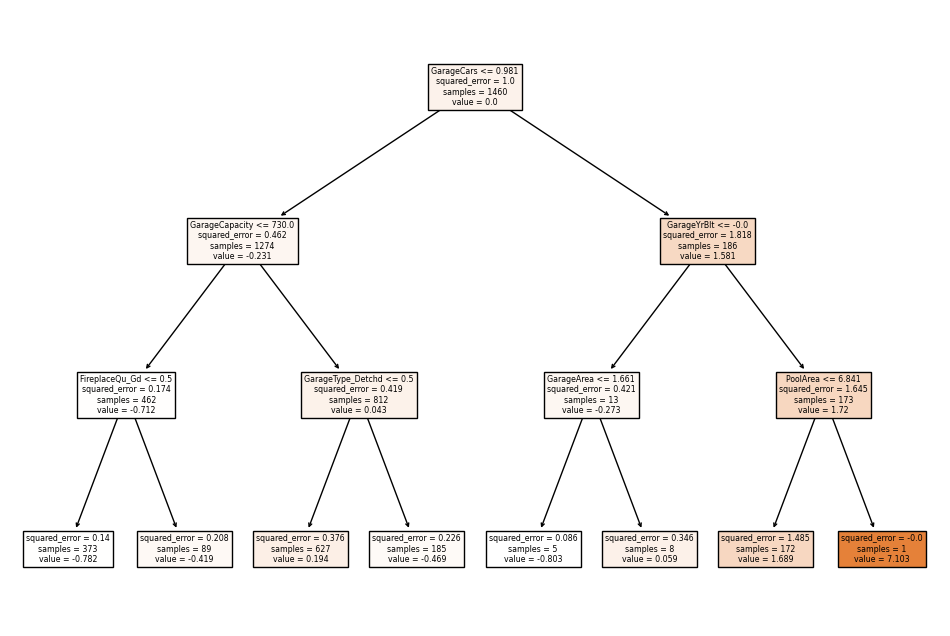

In [83]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

dt = DecisionTreeRegressor(max_depth=3)
dt.fit(X, y)

plt.figure(figsize=(12, 8))
tree.plot_tree(dt, feature_names=X.columns, filled=True)
plt.show()